# About Dataset

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

Souce: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# Goals

The goal of this project is to predict whether a hotel booking will be canceled in the future. By accurately predicting cancellations, we aim to minimize financial losses due to sudden cancellations and optimize hotel occupancy management.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests
%matplotlib inline

In [ ]:
pip install dotenv

# Import Dataset

In [ ]:
with open('/content/.env', 'w') as f:
  f.write('TOKEN=')

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv(dotenv_path="/content/.env", override=True)

True

In [ ]:
url = "https://raw.githubusercontent.com/Naufalfdh19/hotel_bookings/main/hotel_bookings.csv"

headers = {'Authorization': f'token {os.getenv("TOKEN")}',
           'Accept': 'application/vnd.github.v3.raw'}
response = requests.get(url, headers=headers)

df = pd.read_csv(StringIO(response.text))
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleaning

## Check Duplicate Data

In [ ]:
print(f'Total number of duplicated values is {df.duplicated().sum()}')

Total number of duplicated value is 31994


In [ ]:
# drop duplicate values
df = df.drop_duplicates()

# check duplicate values once again
print(f'Total number of duplicated values right now is {df.duplicated().sum()}')

Total number of duplicated values right now is 0


## Check Missing Values

In [ ]:
# check missing values for each column

df.isnull().sum().rename('Total Missing Values').sort_values(ascending=False)

,Total Missing Values
company,82137
agent,12193
country,452
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


1. Remove rows where the country column is null, since they account for only 0.4% of the data and are unlikely to affect overall analysis.

2. Drop the company column because over 90% of its values are missing, making it unsuitable for modeling or analysis.

3. Fill missing values in the agent column with the category 'Unknown', as this feature holds important information that could contribute significantly to machine learning model performance.

In [ ]:
df = df.drop(["company"], axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df['agent'] = df['agent'].fillna(df['agent'].mean())

# Explatory Data Analysis

## Distribution

In [ ]:
df_eda = df.copy()

In [ ]:
for col in df_eda.describe(include='object').columns:
    print(col)
    print(df_eda[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['GBR' 'PRT' 'USA' 'ESP' 'IRL' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU' 'FRA'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE' 'BRA'
 'FIN' 'MOZ' 'BWA' 'LUX' 'NLD' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'CYM' 'ZMB' 'ZWE'
 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV' 'HKG' 'ISR' 'IRN' 'GEO'
 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT' 'NGA' 'MDV' 'VEN'
 'SVK' 'AGO' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC' 'AZE' 'BHR'
 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR' 'MUS' 'COM'
 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 

In [ ]:
# convert undefined value to Unknown value for easier preprocessing

def convert_to_unknown(col):
  return df_eda[col].apply(lambda x: 'Unknown' if x == 'Undefined' else x)

In [ ]:
df_eda['meal'] = convert_to_unknown('meal')

In [ ]:
# print the result after converted

col = 'meal'

print(col)
print(df_eda[col].unique())
print('-'*50)

meal
['BB' 'FB' 'HB' 'SC' 'Unknown']
--------------------------------------------------


### Numerical Columns

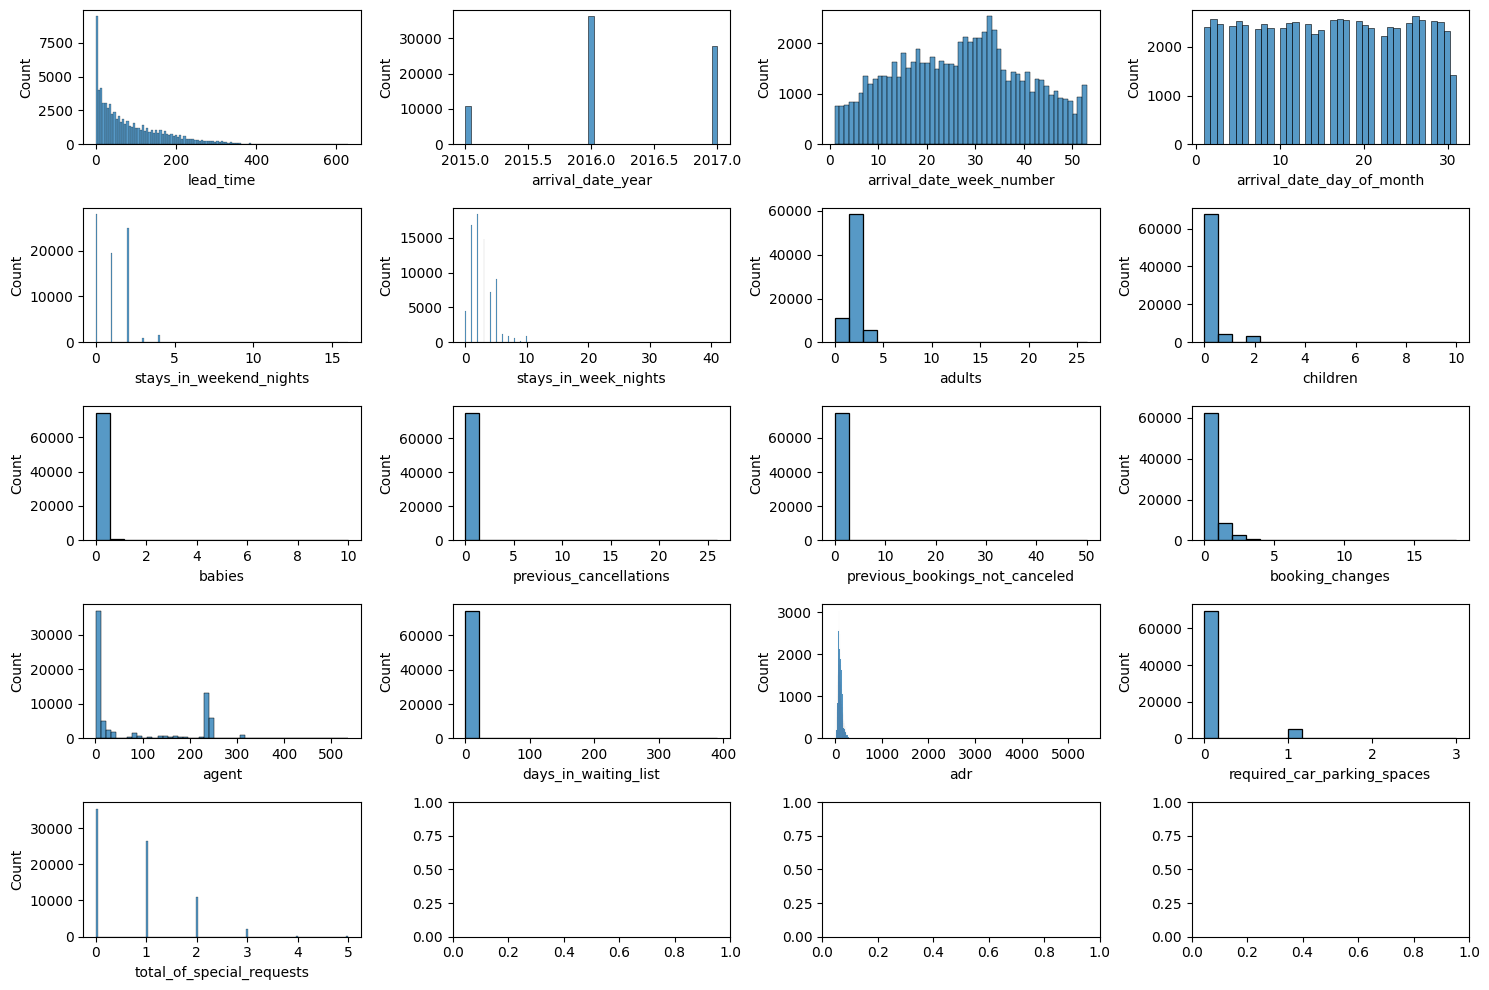

In [ ]:
# this drop_columns variable is the columns that represent categorical value but instead has a type int, like binary value
drop_columns = ['is_canceled', 'is_repeated_guest']

num_cols = df_eda.drop(drop_columns, axis=1).select_dtypes(include=["float","int"]).columns
cols = 4
rows = int(np.ceil(len(num_cols) / 4))

fig, ax = plt.subplots(rows, cols,figsize=(15,10))
ax = ax.flatten()

for i in range(len(num_cols)):
    sns.histplot(data=df_eda, x=num_cols[i], ax=ax[i])

plt.tight_layout()

In [ ]:
from scipy.stats import skew

In [ ]:
# calculate the skewness for each numerical columns

for col in num_cols:
  print(f'the skewness of {col} column: {skew(df_eda[col])}')

the skewness of lead_time column: 1.34388807421039
the skewness of arrival_date_year column: -0.31836829152235574
the skewness of arrival_date_week_number column: 0.01617199752073823
the skewness of arrival_date_day_of_month column: -0.00014499092865050852
the skewness of stays_in_weekend_nights column: 1.1894262229685006
the skewness of stays_in_week_nights column: 2.418968771972704
the skewness of adults column: 6.319411805797373
the skewness of children column: 3.312341706643377
the skewness of babies column: 23.1762278353529
the skewness of previous_cancellations column: 46.94166682740049
the skewness of previous_bookings_not_canceled column: 35.86800822460898
the skewness of booking_changes column: 5.658353620414445
the skewness of agent column: 0.8937825273656018
the skewness of days_in_waiting_list column: 18.74648463753049
the skewness of adr column: 12.995189670495336
the skewness of required_car_parking_spaces column: 3.386676360737746
the skewness of total_of_special_request

Use power transform for numerical value that have skewness > 1.

<Axes: xlabel='is_canceled', ylabel='count'>

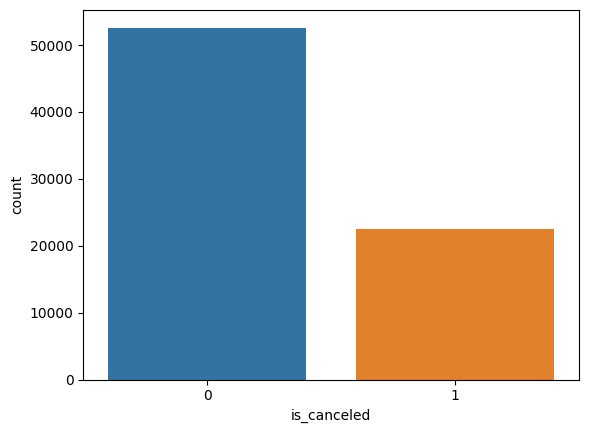

In [ ]:
# is_canceled distribution

sns.countplot(data=df_eda, x='is_canceled', hue='is_canceled', legend=False)

<Axes: xlabel='is_repeated_guest', ylabel='count'>

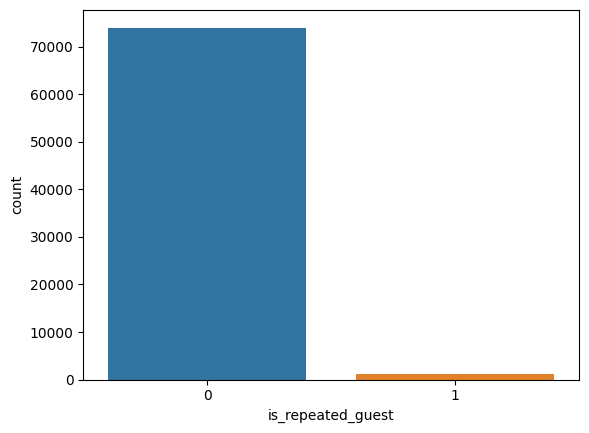

In [ ]:
# is_repeated_guest distribution

sns.countplot(data=df_eda, x='is_repeated_guest', hue='is_repeated_guest', legend=False)

### Categorical Columns


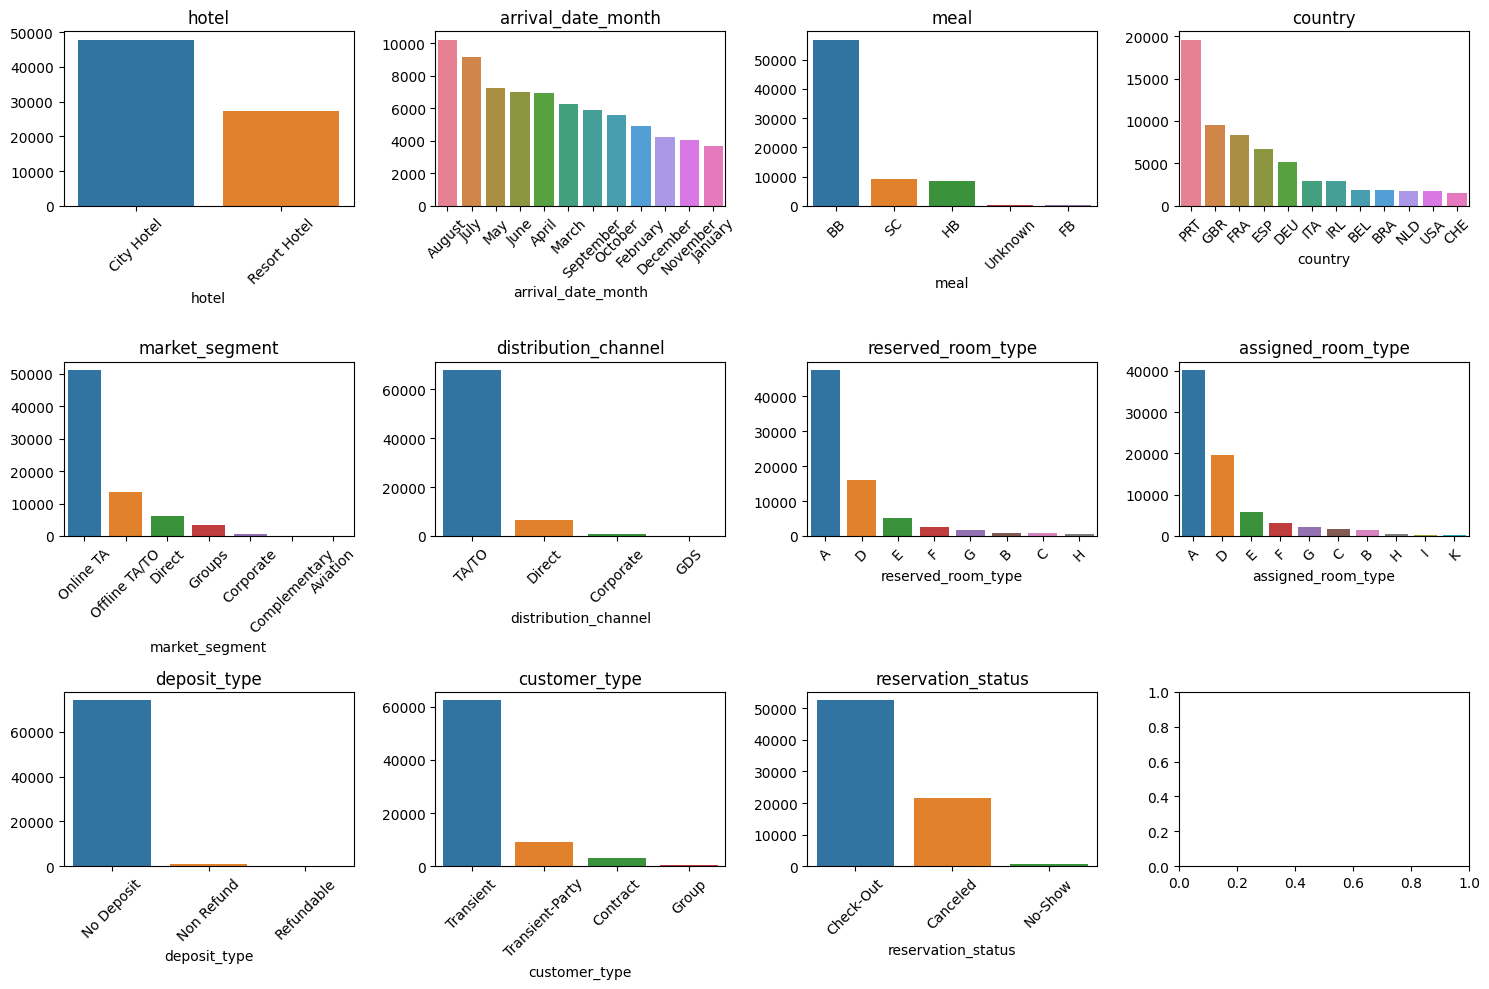

In [ ]:
cat_col = df_eda.drop(["reservation_status_date"], axis=1).select_dtypes(include=['object']).columns
cols = 4
rows = int(np.ceil(len(cat_col)/cols))

fig, ax = plt.subplots(rows, cols, figsize=(15,10))
ax = ax.flatten()

for i in range(len(cat_col)):
    col = cat_col[i]

    val_count = df_eda[col].value_counts().head(12)

    x = val_count.index
    y = val_count.values

    sns.barplot(x=x, y=y, ax=ax[i], hue=x)

    ax[i].set_title(col)
    ax[i].set_xticks(range(len(x)))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

plt.tight_layout()

## Insight

In [ ]:
# Total booking

non_canceled_booking = df_eda[df_eda["is_canceled"] == 0].shape[0]
canceled_booking = df_eda[df_eda["is_canceled"] == 1].shape[0]

print("Total booking with non-canceled status is ", non_canceled_booking)
print("Total booking with canceled status is ", canceled_booking)



Total booking with non-canceled status is  52612
Total booking with canceled status is  22462


In [ ]:
# Cancellation Percentage

canceled_booking = df_eda[df_eda["is_canceled"] == 1].shape[0]
total_booking = df_eda.shape[0]

cancellation_per = canceled_booking/total_booking*100

print(f"Cancellation percentage is {cancellation_per:.2f}%")

Cancellation percentage is 29.92%


Text(0, 0.5, 'Lead Time (days)')

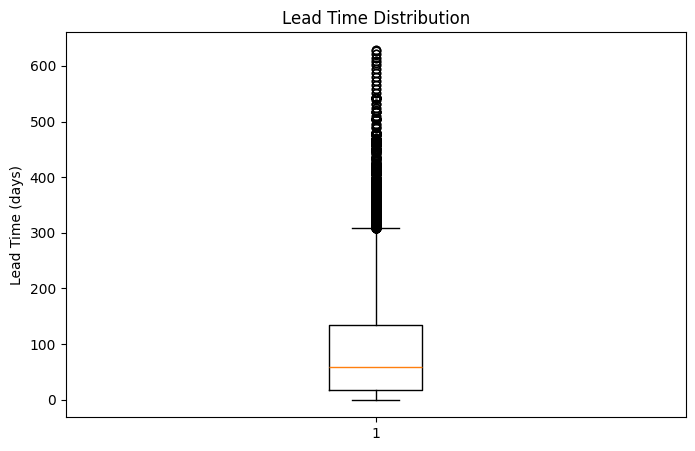

In [ ]:
# Lead Time Central Tendency

fig, ax = plt.subplots(figsize=(8,5))
ax.boxplot(df_eda["lead_time"])
ax.set_title("Lead Time Distribution")
ax.set_ylabel("Lead Time (days)")

In [ ]:
# Average Lead Time

# i use median as a measurement because there is a lot of outliers in "lead_time" column
average_lead_time = df_eda["lead_time"].median()

print(f"Average lead time for hotels booking is {average_lead_time:.0f} days", )

Average lead time for hotels booking is 59 days


Text(0.5, 1.0, 'Distribution of Hotel Type')

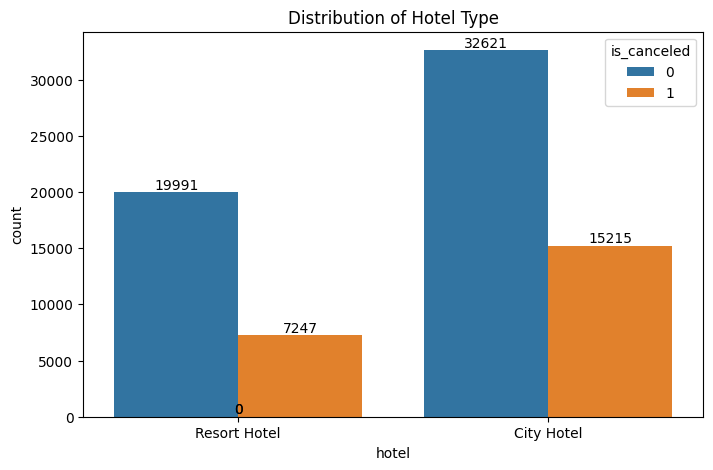

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
graph = sns.countplot(data=df_eda, x="hotel", hue='is_canceled')

for p in graph.patches:
    graph.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

ax.set_title("Distribution of Hotel Type")

**Insight**
1. The number of bookings for city hotels is significantly higher compared to resort hotels.
2. The proportion of canceled bookings compared to non-canceled ones is 30% for city hotels, which is much higher than the 20% for resort hotels.

**Conclusion**
1. Guests staying at city hotels have a variety of needs beyond just vacations, such as business trips, family events, and other activities. This results in a higher proportion of customers choosing city hotels over resort hotels.
2. The higher cancellation rate in city hotels suggests that customers tend to be more flexible in changing their plans. This could be due to business factors, schedule changes, or the greater flexibility of city hotel bookings compared to resort hotels, which are usually planned further in advance for vacations.

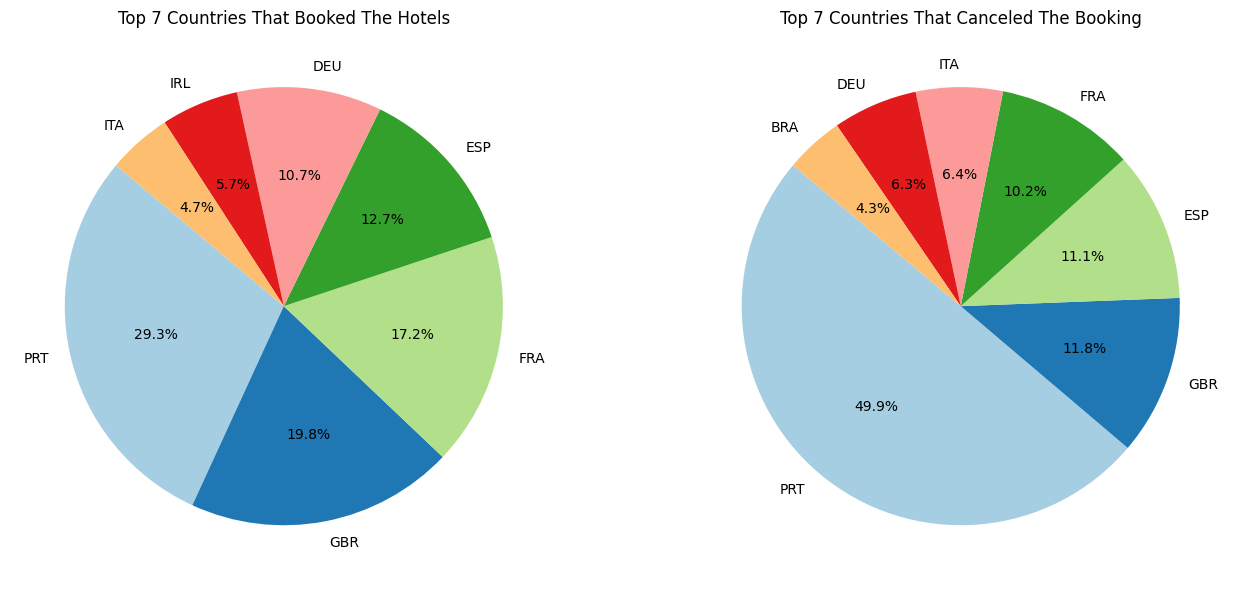

In [ ]:
import matplotlib.pyplot as plt

# Top 7 countries that booked the hotel (not canceled)
top_countries_booked = df_eda[df_eda['is_canceled'] == 0]["country"].value_counts().head(7)

# Top 7 countries that canceled the booking
top_countries_canceled = df_eda[df_eda['is_canceled'] == 1]["country"].value_counts().head(7)

fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax = ax.flatten()

ax[0].pie(top_countries_booked, labels=top_countries_booked.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax[0].set_title("Top 7 Countries That Booked The Hotels")

ax[1].pie(top_countries_canceled, labels=top_countries_canceled.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax[1].set_title("Top 7 Countries That Canceled The Booking")

plt.tight_layout()



**Top 7 Countries That Booked the Hotels**
1. Portugal (PRT): 37.4%
2. United Kingdom (GBR): 17.9%
3. France (FRA): 15%
4. Spain (ESP: 11.4%
5. Germany (DEU): 9.2%
6. Ireland (IRL): 5%
7. Italy (ITA): 4.2%

   
**Top 7 Countries That Canceled The Booking**
1. Portugal (PRT): 53.7%
2. United Kingdom (GBR): 10.9%
3. Spain (ESP: 10.2%
4. France (FRA): 9.5%
5. Italy (ITA): 5.9%
6. Germany (DEU): 5.8%
7. Brazil (BRA): 4%


**Insights**
1. Portugal has the highest number of hotel bookings, indicating that the domestic market plays a significant role in the hotel industry.
2. European countries dominate hotel booking transactions, including the United Kingdom, France, Spain, Germany, Ireland, and Italy.
3. Despite having the highest number of bookings, Portugal also has the highest cancellation rate, accounting for more than 50% of total cancellations. This could be due to the flexibility of domestic travel or more lenient cancellation policies for local travelers.
4. The cancellation rates in other European countries appear relatively balanced, which may be influenced by various factors such as changes in travel plans, hotel prices, or other external circumstances.
5. Brazil does not appear among the top seven countries with the highest hotel bookings but ranks among the top seven for booking cancellations. This suggests a different cancellation pattern compared to European countries.

**Conclusion**
1. Portugal is the key market for hotel bookings, but it also has the highest cancellation rate.
2. European countries dominate the hotel industry, making them crucial markets for business strategies.
3. Cancellations are not necessarily proportional to booking volumes, as seen in Brazil, which exhibits a distinct cancellation pattern.
4. If the business goal is to minimize losses due to cancellations, Portugal should be the primary focus of cancellation mitigation strategies. This could include implementing stricter cancellation policies or offering incentives to encourage customers to maintain their reservations.

   

In [ ]:
test = df_eda["arrival_date_month"].value_counts()
test

,count
arrival_date_month,
August,10210
July,9170
May,7228
June,6999
April,6915
March,6265
September,5856
October,5605
February,4915


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

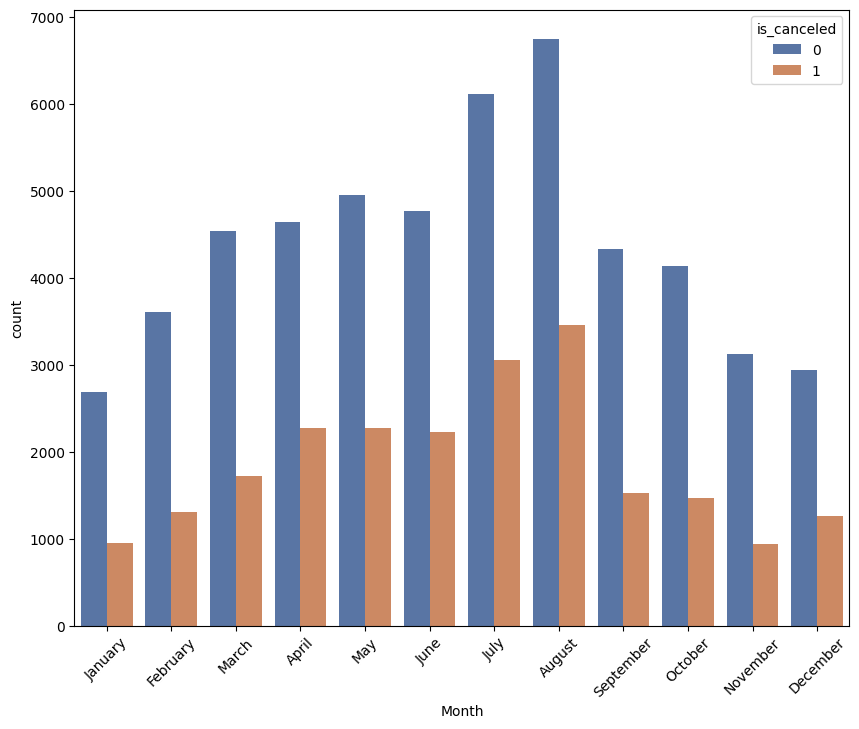

In [ ]:
# Top Visited Month

arrival_month = df_eda["arrival_date_month"].value_counts()

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
sorted_months = sorted(arrival_month.index.tolist(), key=lambda x: month_order.index(x))

fig, ax = plt.subplots(figsize=(10, 8))

sns.countplot(data=df_eda, x="arrival_date_month", hue="is_canceled", order=sorted_months, palette="deep")

ax.set_xlabel('Month')
ax.set_xticks(range(len(ax.get_xticklabels())))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

**Insight**
1. August and July have the highest number of bookings because, during these months, most of Europe experiences summer, which is the peak season for vacations.
2. In contrast to the summer season, the lowest number of bookings occurs during the winter months, specifically in December, November, and January.

**Conclusion**
1. Hotels experience higher occupancy during the summer season.
2. Marketing efforts should be focused on peak months with the highest number of visitors.
3. Offer more diverse vacation packages during low-season months to increase engagement and attract more guests.


In [ ]:
booking_per_month = df_eda.groupby('arrival_date_month').size()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

booking_per_month.index = pd.CategoricalIndex(booking_per_month.index, categories=month_order, ordered=True)

booking_per_month = booking_per_month.sort_index().reset_index(name='booking_count')


In [ ]:
booking_per_month['mom_growth'] = booking_per_month['booking_count'].pct_change() * 100

In [ ]:
booking_per_month

,arrival_date_month,booking_count,mom_growth
0,January,3647,NaN
1,February,4915,34.768303
2,March,6265,27.466938
3,April,6915,10.375100
4,May,7228,4.526392
5,June,6999,-3.168235
6,July,9170,31.018717
7,August,10210,11.341330
8,September,5856,-42.644466
9,October,5605,-4.286202


In [ ]:
# Repeated Guest

repeated_guest = df_eda[df_eda['is_repeated_guest'] == 1]['is_repeated_guest'].value_counts().values
total_guest = df_eda['is_repeated_guest'].value_counts().values

repeated_guest_percentage = repeated_guest[0]/total_guest[0]*100
print(f"repeated guest percetage: {repeated_guest_percentage}%")

repeated guest percetage: 1.4842651670812157%


**Insight**
1. total repeated guest for booking the hotel is 4%, which is mean there is 4% from the total customer that loyal and want to visit the hotel again
2. besides the repeated customer, more than 95% customer that do not visited the customer in second time

**Conclusion**
1. untuk mempertahankan pelanggan yang loyal, pemberian suatu paket atau diskon terhadap fasilitas mungkin bisa digunakan. Atau dari awal, hotel membuat sebuah sistem yang memberikan bonus bagi pelanggan yang loyal memalui poin loyalitas yang bisa didapatkan dengan kunjungan yang sering.
2. Untuk pelanggan yang hanya pernah mengunjungi sekali, maka kita bisa coba cek masalah pada service kita dan mengapa mereka tidak ingin mengujungi hotel lagi. Kita bisa lakukan sentiment analysis disini dari data yang kita peroleh dari feedback customer yang mungkin bisa menjadi motif kita untuk pengembangan lebih lanjut


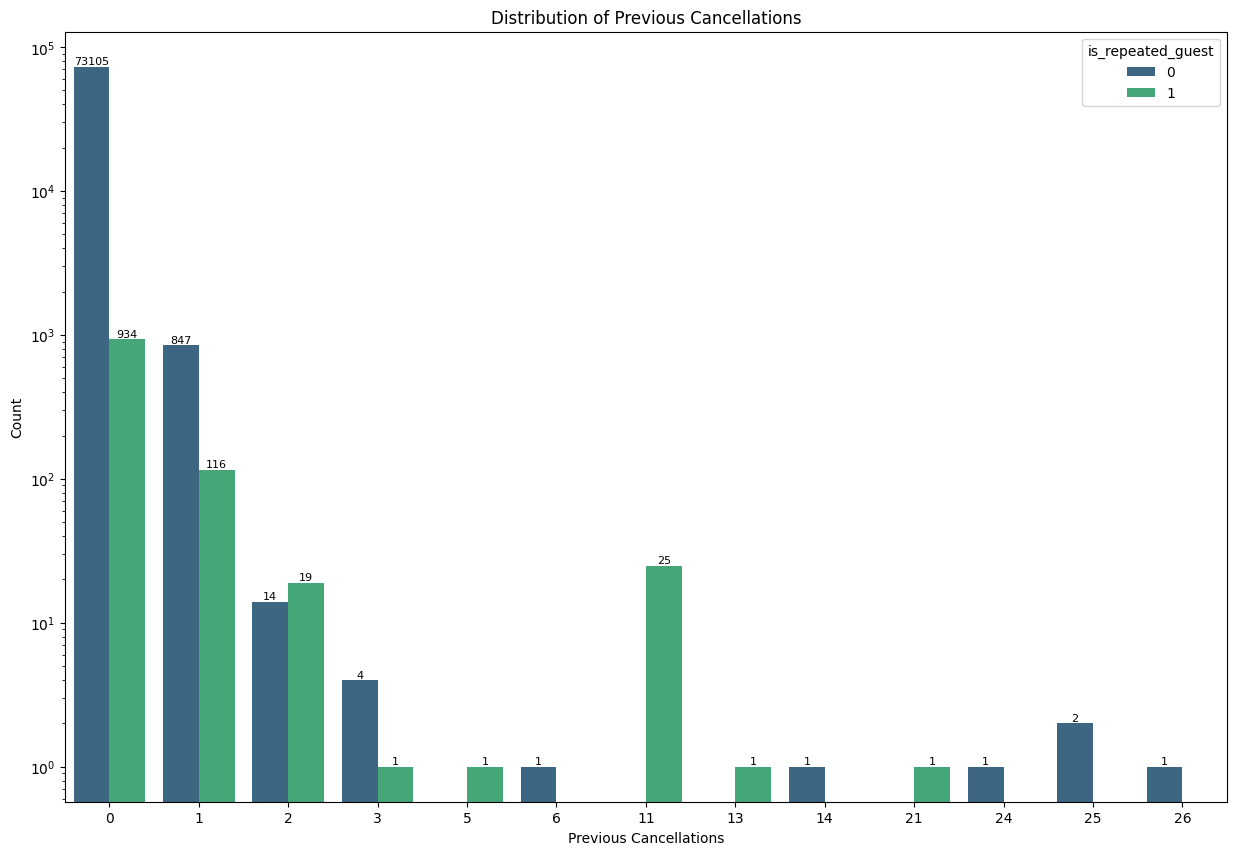

In [ ]:
# previous cancellation

fig, ax = plt.subplots(figsize=(15,10))
graph = sns.countplot(data=df_eda, x="previous_cancellations", hue="is_repeated_guest", ax=ax, palette="viridis")

for p in graph.patches:
    graph.annotate(
                f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black'
                  )


plt.xlabel("Previous Cancellations")
plt.ylabel("Count")
plt.title("Distribution of Previous Cancellations")

plt.yscale("log")



**Insight**
1. More than 80,000 customers did not cancel their bookings before, with a percentage of 98.1%.
2. There is a significant number of cancellations made by 1 to 30 customers, exceeding 11 times the total number of cancellations.

**Conclusion**
1. The majority of customers have well-planned vacations.
2. For cancellations ranging from 1 to 6 times, there might be factors beyond their control, such as unexpected issues with family members or friends, rescheduling, or other unforeseen events that forced them to cancel.
3. However, for cancellations exceeding 11 times, there is a possibility that some customers are misusing the hotel service or attempting to disrupt the business. This should be further investigated, as such an extreme number of cancellations seems highly unreasonable.

In [ ]:
# total adr

print("Total of average daily rate from 2015 to 2017 is", df["adr"].sum())

Total of average daily rate from 2015 to 2017 is 8273212.2299999995


Text(0, 0.5, 'average daily rate')

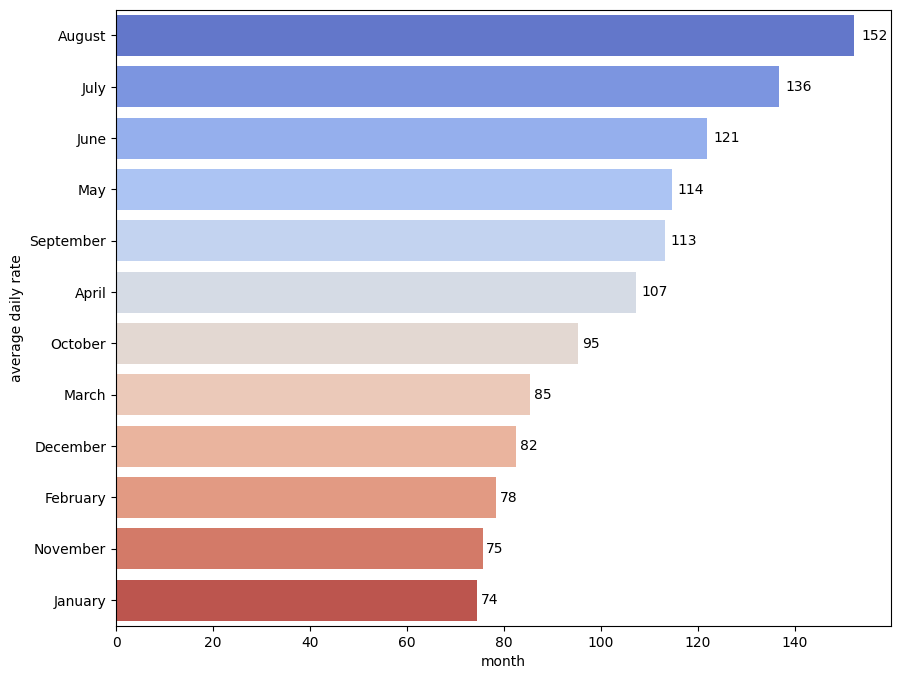

In [ ]:
# average daily rate per month

fig, ax = plt.subplots(figsize=(10,8))


df_avg = df_eda.groupby("arrival_date_month", as_index=False)["adr"].mean()
df_sorted = df_avg.sort_values(by="adr", ascending=False)

graph = sns.barplot(data=df_sorted, y="arrival_date_month", x='adr', ax=ax, hue="arrival_date_month", palette='coolwarm', legend=False)

for p in graph.patches:
    graph.annotate(
                f'{int(p.get_width())}',
                (p.get_x() + p.get_width()*(1.01), p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10, color='black'
                  )


plt.xlabel("month")
plt.ylabel("average daily rate")

**Insight**
1. August and July have the highest ADR per month, exceeding 120.
2. November and January have the lowest ADR per month, with values below 75.

**Conclusion**
1. Hotels can focus more on months during the summer season, as they have higher ADR. This can be achieved through increased marketing, offering more diverse facilities, and enhancing guest experiences.
2. For the winter season, such as November and January, hotels can introduce seasonal offerings, such as cozier room options with better heating, winter-themed facilities like ice skating, warm and comforting food, or even special discounts to attract more guests.

Text(0, 0.5, 'average days in waiting list')

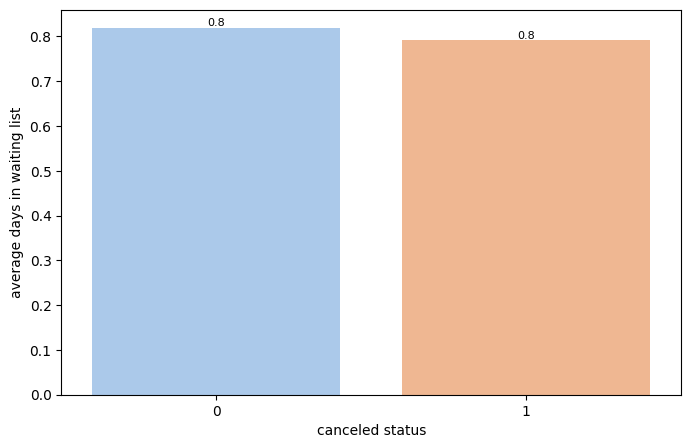

In [ ]:
# days in waiting list impact for customer cancellations

fig, ax = plt.subplots(figsize=(8,5))

data = df_eda.groupby("is_canceled")["days_in_waiting_list"].mean()

graph = sns.barplot(x=data.index, y=data.values, ax=ax, hue=data.index, palette="pastel", legend=False)

for p in graph.patches:
    graph.annotate(
                f'{p.get_height():.1f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black'
                  )

ax.set_xlabel("canceled status")
ax.set_ylabel("average days in waiting list")

**Insight**
1. average days in waiting list for canceled booking has greater than the successful booking.

**Conclusion**
1. long confirmation booking status from hotels makes customer canceled their booking due to their uncertain schedule.
2. hotels shall always communicate to their customer and offering different type of bedroom maybe if the bedroom type that customer was ordered doesn't ready yet, so customer can make their prediction for scheduling more clear.


In [ ]:
df_pivot = df_eda.pivot_table(index="market_segment", columns="is_canceled", aggfunc="size")
df_pivot

is_canceled,0,1
market_segment,,
Aviation,19,5
Complementary,87,12
Corporate,423,93
Direct,5093,1089
Groups,2294,1044
Offline TA/TO,11687,2012
Online TA,33009,18207


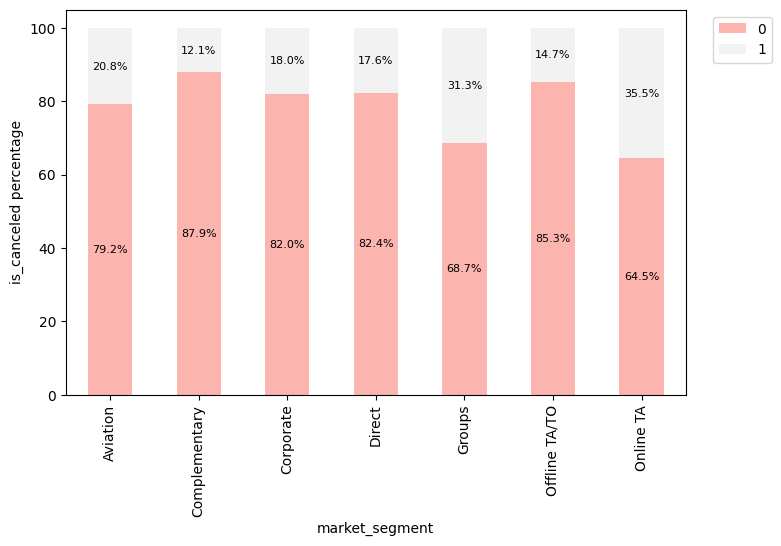

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

data = df_eda.pivot_table(index="market_segment", columns="is_canceled", aggfunc="size")
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

graph = data_percentage.plot(kind="bar", stacked=True, ax=ax, colormap="Pastel1")

for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    if height > 0:  # Hindari label untuk nilai 0
        graph.annotate(f'{height:.1f}%', (x, y), ha='center', va='center', fontsize=8, color='black')

ax.set_ylabel("is_canceled percentage")
ax.legend(loc=1, bbox_to_anchor=(1.15,1))

**Insight**
1. Groups and Online TA has the highest cancellation percentage with 27% and 35.4% of the total booking for each market segment.

**Strategies**
1. Offer discounts for non-refundable booking to encourage commitment or offer it to a group segment based on their group size.
2. Offering flexible rescheduling options instead of cancellations
3. Implement strict cancellation policies, especially for customers who cancel on the same day of booking.

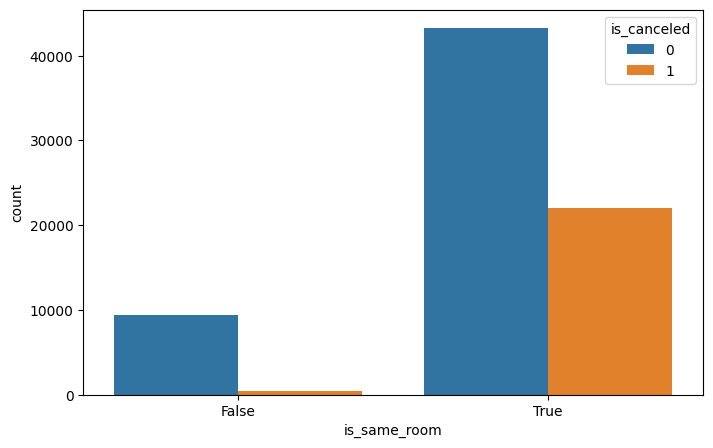

In [ ]:
# Cancellation pattern based on the room matching

df_eda['is_same_room'] = df_eda['reserved_room_type'] == df_eda['assigned_room_type']

fig, ax = plt.subplots(figsize=(8,5))

data = sns.countplot(data=df_eda, x='is_same_room', hue='is_canceled')


In [ ]:
# room matching rate

percentage = df_eda[df_eda["reserved_room_type"] == df_eda["assigned_room_type"]].shape[0] / df_eda.shape[0] * 100

print(f"The percentage of customer that get the same assigned and reserved room is {percentage:.2f}%")

The percentage of customer that get the same assigned and reserved room is 86.99%


<Axes: xlabel='deposit_type', ylabel='count'>

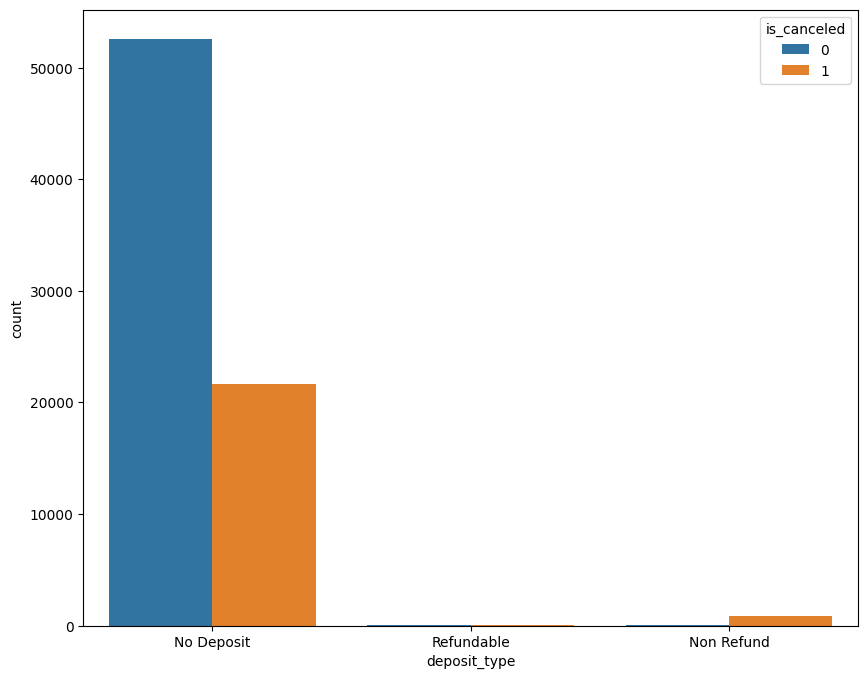

In [ ]:
# cancellation based on deposit type

fig, ax = plt.subplots(figsize=(10, 8))

sns.countplot(data=df, x='deposit_type', hue='is_canceled', ax=ax)

**Insight**
1. Tipe deposit "No Deposit" memiliki jumlah yang paling banyak diikuti dengan "Non Refund", dan yang terakhir, "Refundable Type".

**Conclusion**
1. Tipe deposit "No Deposit" memiliki fleksibilitas yang tinggi sehingga tidak perlu membutuhkan perencanaan yang matang untuk tinggal di hotel karena sebagian dari mereka bisa langsung memesan hotel di waktu yang sama dengan keinginan mereka untuk booking.

In [ ]:
# cancellations based on deposit type in percetage

cancel_stats = df_eda.groupby(['deposit_type', 'is_canceled']).size().unstack(fill_value=0)

cancel_stats['total'] = cancel_stats[0] + cancel_stats[1]

cancel_stats['cancel_percent'] = (cancel_stats[1] / cancel_stats['total']) * 100
cancel_stats['not_cancel_percent'] = (cancel_stats[0] / cancel_stats['total']) * 100

cancel_stats.reset_index()

is_canceled,deposit_type,0,1,total,cancel_percent,not_cancel_percent
0,No Deposit,52575,21618,74193,29.137520,70.862480
1,Non Refund,21,824,845,97.514793,2.485207
2,Refundable,16,20,36,55.555556,44.444444


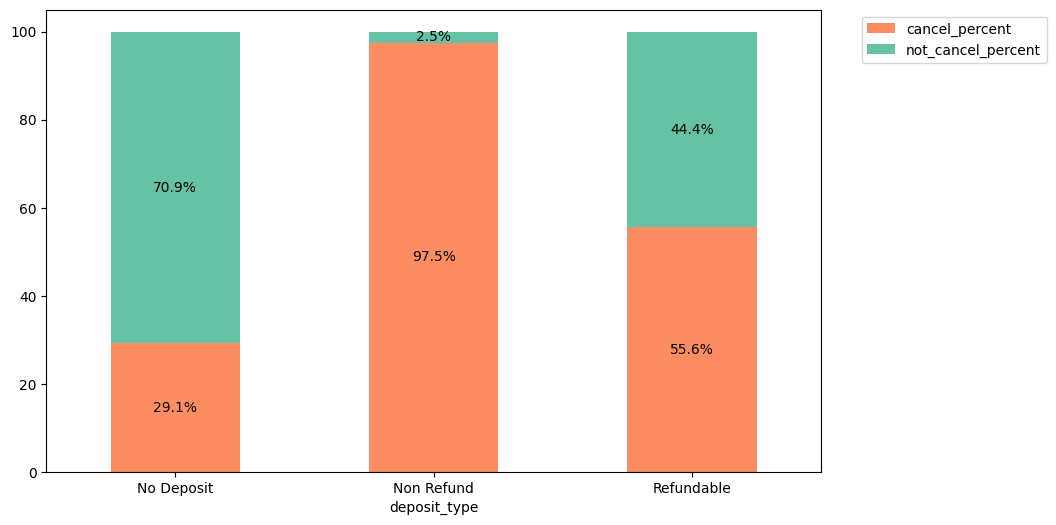

In [ ]:
cancel_stats_reset = cancel_stats.reset_index()

ax = cancel_stats_reset.plot(
    kind='bar',
    x='deposit_type',
    y=['cancel_percent', 'not_cancel_percent'],
    stacked=True,
    figsize=(10, 6),
    color=["#fc8d62", "#66c2a5"])

for idx, row in cancel_stats_reset.iterrows():
    cancel = row['cancel_percent']
    not_cancel = row['not_cancel_percent']

    ax.text(idx, cancel / 2, f"{cancel:.1f}%", ha='center', va='center', color='black', fontsize=10)

    ax.text(idx, cancel + not_cancel / 2, f"{not_cancel:.1f}%", ha='center', va='center', color='black', fontsize=10)

plt.xticks(rotation=0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))


**Insight**
1. The "Non Refund" deposit type accounts for over 90% of total booking cancellations.
2. The "No Deposit" and "Refundable" types each have around 25% cancellation rates from their total bookings.

**Conclusion & Analysis**
1. The exceptionally high cancellation rate for the "Non Refund" type is quite surprising. Psychologically, a non-refundable booking should imply a higher level of commitment from the guest, as canceling would result in a financial loss. This counterintuitive behavior suggests that many of these bookings may not be genuine or could be part of fraudulent activities.
2. On the other hand, the "No Deposit" and "Refundable" types showing approximately 25% cancellation rates appear to be within a reasonable range. This may reflect normal booking behavior where changes in plans, emergencies, or scheduling conflicts can lead to cancellations.
3. A deeper investigation is highly recommended for the "Non Refund" bookings. Potential factors that may contribute to the high cancellation rate include:
  - Fraudulent behavior, such as block-booking by competitors to disrupt inventory.
  - Automated bot bookings by malicious users.
  - Ineffective enforcement of the non-refundable policy by certain third-party platforms (OTAs).
  - Fake or invalid credit card information, especially if proper verification isn't in place.